# Accidentes viales en la zona metropolitana de guadalajara

This notebook provides the procedures used in the report.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from os.path import join
from settings import FileConf

## General Annual Accidents Plot

In [2]:
df = pd.read_csv(FileConf.FileNames.accidents_per_year)

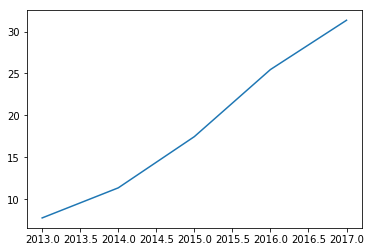

In [4]:
accidentes_general = df["accidentes_general"].values
accidentes_general_diff = -100*(accidentes_general[1:] - accidentes_general[:-1]) / accidentes_general[:-1]
plt.plot(df["year"].values[1:], accidentes_general_diff)
plt.show()

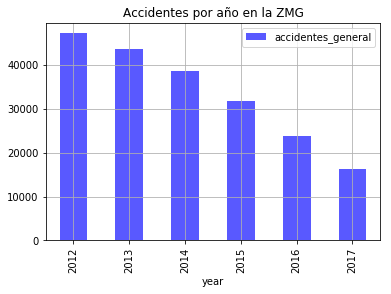

In [5]:
df.plot.bar(x="year", y="accidentes_general", color="blue", alpha=0.65)
plt.title("Accidentes por año en la ZMG")
plt.grid()
plt.show()

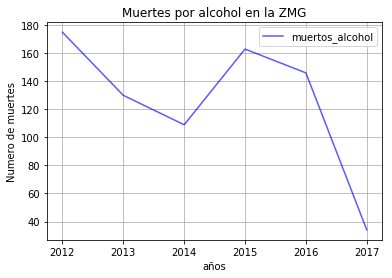

In [6]:
muertos_alcohol_img = join(FileConf.Paths.img, "muertos_alcohol_img.png")
df.plot("year", "muertos_alcohol", color="blue", alpha=0.65)
plt.title("Muertes por alcohol en la ZMG")
plt.ylabel("Numero de muertes")
plt.xlabel("años")
plt.grid()
plt.show()

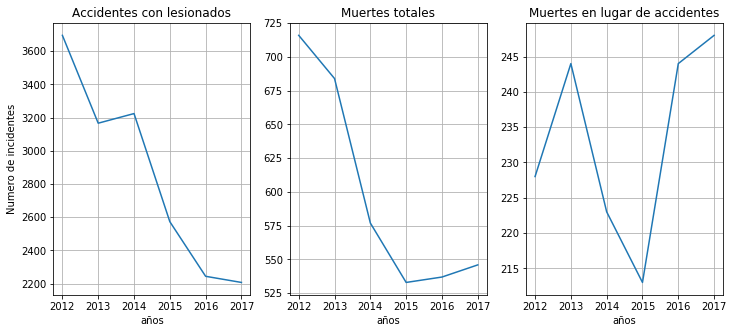

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
# Lesionados
plt.subplot(1, 3, 1)
plt.plot(df["year"], df["accidentes_lesionados"])
plt.title("Accidentes con lesionados")
plt.ylabel("Numero de incidentes")
plt.xlabel("años")
plt.grid()
plt.xticks(df["year"])
# Muertos
plt.subplot(1, 3, 2)
plt.plot(df["year"], df["muertos"])
plt.title("Muertes totales")
plt.xlabel("años")
plt.grid()
plt.xticks(df["year"])
# Muertos en lugar de accidente
plt.subplot(1, 3, 3)
plt.plot(df["year"], df["muertos_en_lugar_de_accidente"])
plt.title("Muertes en lugar de accidentes")
plt.xlabel("años")
plt.grid()
plt.xticks(df["year"])
plt.show()

## Distractions Plot

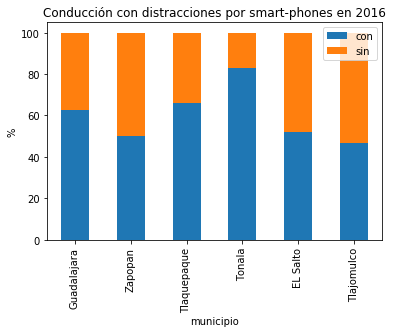

In [9]:
distractions = pd.read_csv(join(FileConf.Paths.data, "distacciones_2016.csv"))
distractions_img = join(FileConf.Paths.img, "manejo_con_celular.png")
distractions.plot.bar(x="municipio", stacked=True)
plt.title("Conducción con distracciones por smart-phones en 2016")
plt.ylabel("%")
plt.show()

plt.savefig(distractions_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
plt.close()

## Vehicles Plot

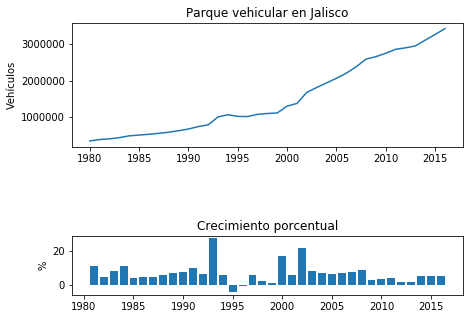

0.037008802574828345

In [10]:
vehicles = pd.read_csv(join(FileConf.Paths.data, "vehiculos_en_circulacion.csv"))

jalisco = vehicles.Jalisco.values
years = vehicles.Anios.values
jalisco_diff = jalisco[1:] / jalisco[:-1] - 1

parque_vehicular_img = join(FileConf.Paths.img, "parque_vehicular.png")
fig, ax = plt.subplots(figsize=(7, 5))
plt.subplot(2, 1, 1)
plt.plot(years, jalisco)
plt.title("Parque vehicular en Jalisco")
plt.ylabel("Vehículos")
plt.subplot(4, 1, 4)
plt.bar(years[1:], 100 * jalisco_diff)
plt.title("Crecimiento porcentual")
plt.ylabel("%")

plt.show()

#plt.savefig(parque_vehicular_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
#plt.close()

average_growth = np.mean(jalisco_diff[-5:])
average_growth

## Phone usage plot

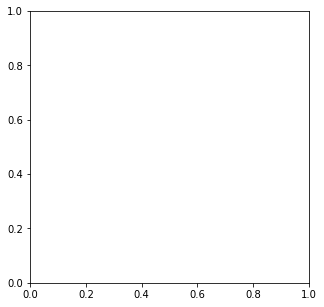

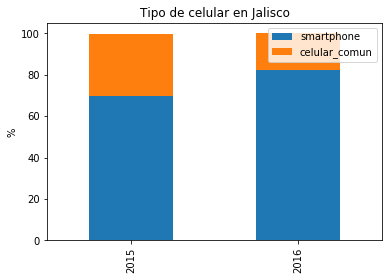

In [13]:
phone_type = pd.read_csv(join(FileConf.Paths.data, "jaslico_tipo_celular.csv"))
phone_users = pd.read_csv(join(FileConf.Paths.data, "usuarios_jalisco_celular.csv"))

fig, ax = plt.subplots(figsize=(5, 5))
phone_type_img = join(FileConf.Paths.img, "tipo_de_celular.png")
phone_type[["smartphone", "celular_comun", "anio"]].plot.bar(x="anio", stacked=True)
plt.title("Tipo de celular en Jalisco")
plt.ylabel("%")
plt.xlabel("")

plt.show()
    
#plt.savefig(phone_type_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
#plt.close()

## Create Tech Plots

gs[-1] = 95.118899
ss[-1] = 98.733823
Smartphone percentage 2021: 93.914526


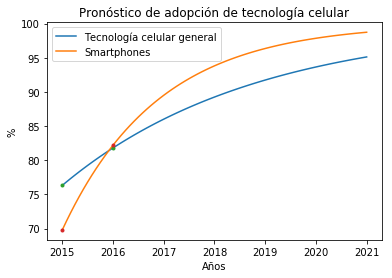

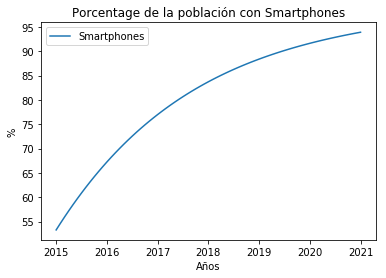

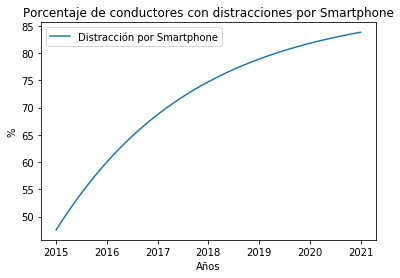

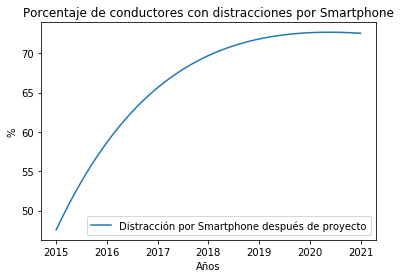

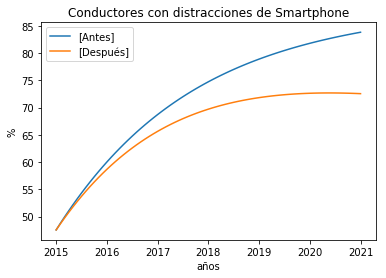

Conductores con distracciones de smartphones
[69.70184264 69.94220951 70.16958125 70.38438422 70.58703144 70.77792292
 70.957446   71.12597564 71.2838748  71.43149468 71.56917514 71.69724492
 71.81602201 71.92581397 72.02691818 72.11962217 72.20420394 72.2809322
 72.35006668 72.41185841 72.46654997 72.51437579 72.55556237 72.59032856
 72.6188858  72.64143836 72.65818357 72.66931204 72.6750079  72.67544902
 72.67080718 72.66124833 72.64693272 72.62801516 72.60464516 72.57696713
 72.54512054]


In [11]:
    def create_exp_function(alpha, beta):
        return lambda x: -alpha*np.exp(-beta*x)+100
    f_g = create_exp_function(23.68, 0.26321)
    f_s = create_exp_function(30.2, 0.52864)
    step = 1/12
    initial_value = 0
    final_value = 3 + 3 + step
    years = np.arange(initial_value, final_value, step)

    gs = [f_g(x) for x in years]
    ss = [f_s(x) for x in years]

    print("gs[-1] = %f" % gs[-1])
    print("ss[-1] = %f" % ss[-1])

    result = [g * s / 100 for g, s in zip(gs, ss)]
    print("Smartphone percentage 2021: %f" % result[-1])

    forecast_usage_img = join(FileConf.Paths.img, "pronostico_adopcion.png")
    plt.plot(years + 2015, gs, label="Tecnología celular general")
    plt.plot(years + 2015, ss, label="Smartphones")
    plt.plot([2015, 2016], [76.32, 81.8], ".")
    plt.plot([2015, 2016], [69.8, 82.2], ".")
    plt.title("Pronóstico de adopción de tecnología celular")
    plt.xlabel("Años")
    plt.ylabel("%")
    plt.legend()

    plt.show()
    #plt.savefig(forecast_usage_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    smartphone_usage_img = join(FileConf.Paths.img, "smartphone_usage.png")
    plt.plot(years + 2015, result, label="Smartphones")
    plt.title("Porcentage de la población con Smartphones")
    plt.xlabel("Años")
    plt.ylabel("%")
    plt.legend()

    plt.show()
    #plt.savefig(smartphone_usage_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    # Driving with distractions
    
    k = 0.892459
    delta = lambda x: k * x
    delta_list = [delta(x) for x in result]

    df = pd.DataFrame([])
    df["years"] = years
    df["months"] = df.years * 12
    df["celphone_exposure"] = gs
    df["smartphone_proportion"] = ss
    df["smartphone_exposure"] = result
    df["delta"] = delta_list


    distraction_img = join(FileConf.Paths.img, "distraction.png")
    plt.plot(years + 2015, delta_list, label="Distracción por Smartphone")
    plt.title("Porcentaje de conductores con distracciones por Smartphone")
    plt.xlabel("Años")
    plt.ylabel("%")
    plt.legend()

    plt.show()
    #plt.savefig(distraction_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    delta_list[-1]

    # Driving with ditractions [project]
    k_t = lambda x: k - 0.02 * x
    new_delta = lambda s, y: k_t(y) * s
    df["delta_project"] = df.apply(lambda x: new_delta(x["smartphone_exposure"], x["years"]), 1)

    distraction_project_img = join(FileConf.Paths.img, "distraction_project.png")
    plt.plot(years + 2015, df.delta_project.values, label="Distracción por Smartphone después de proyecto")
    plt.title("Porcentaje de conductores con distracciones por Smartphone")
    plt.xlabel("Años")
    plt.ylabel("%")
    plt.legend()

    plt.show()
    #plt.savefig(distraction_project_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    df.to_csv("output/forecast_smartphone.csv", index=None)

    df["years"] = df.years + 2015

    # Combine plot

    smartphones_complete_forecast_img = join(FileConf.Paths.img, "smartphone_complete_forecast.png")
    df.drop(columns=["months", "delta_project"]).rename(
        columns={
            "delta": "Conductores con distracciones de Smartphone",
            "smartphone_proportion": "Proporción de Smartphones respecto a tec. celular",
            "smartphone_exposure": "Población expuesta a smartphones",
            "celphone_exposure": "Población expuesta a tec. celular."
        }).plot(x="years")
    plt.title("Pronóstico: tecnología celular")
    plt.ylabel("%")
    plt.xlabel("años")
    plt.savefig(smartphones_complete_forecast_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    # Plot with project
    distraction_compare_img = join(FileConf.Paths.img, "distraction_compare_img.png")
    df[["delta", "delta_project", "years"]].rename(
        columns={
            "delta": "[Antes]",
            "delta_project": "[Después]"
        }).plot(x="years")
    plt.title("Conductores con distracciones de Smartphone")
    plt.ylabel("%")
    plt.xlabel("años")
    
    plt.show()
    #plt.savefig(distraction_compare_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    
    print("Conductores con distracciones de smartphones")
    print(df.query("years >= 2018")["delta_project"].values)

In [21]:
df["y"] = df.years.apply(lambda x: int(x))
print("Conductores con distracciones de smartphones")
print(df.query("years >= 2018")["delta_project"].values)


df.groupby("y").delta_project.mean().reset_index().query("y >= 2018").sort_values("y", ascending=True)["delta_project"].values

Conductores con distracciones de smartphones
[69.70184264 69.94220951 70.16958125 70.38438422 70.58703144 70.77792292
 70.957446   71.12597564 71.2838748  71.43149468 71.56917514 71.69724492
 71.81602201 71.92581397 72.02691818 72.11962217 72.20420394 72.2809322
 72.35006668 72.41185841 72.46654997 72.51437579 72.55556237 72.59032856
 72.6188858  72.64143836 72.65818357 72.66931204 72.6750079  72.67544902
 72.67080718 72.66124833 72.64693272 72.62801516 72.60464516 72.57696713
 72.54512054]


array([70.8023486 , 72.27185452, 72.6439077 , 72.54512054])

In [24]:
df["smartphone_exposure"]
df.groupby("y").smartphone_exposure.mean().reset_index().query("y >= 2018").sort_values("y", ascending=True)["smartphone_exposure"].values

array([86.00853439, 89.97632461, 92.74662858, 93.91452562])

## Cellphone accidents

Number for fatal accidents : 3317.350393681594
Number for fatal accidents after : 1982.5882882481756
Diff: 1334.7621054334186
Saved lifes
  years  saved_lifes  saved_lifes_money
0  2016   175.620089       2.962776e+08
1  2017   223.483064       3.770242e+08
2  2018   267.736689       4.516817e+08
3  2019   311.161928       5.249417e+08
4  2020   355.140158       5.991346e+08
5  2021   400.723330       6.760351e+08


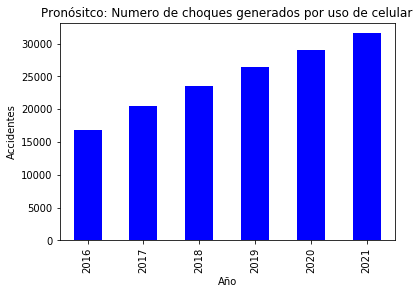

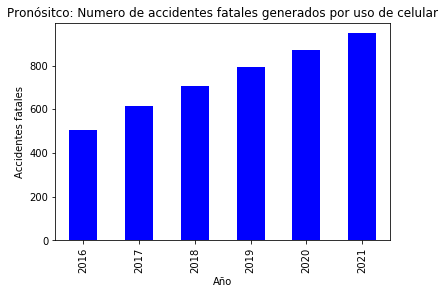

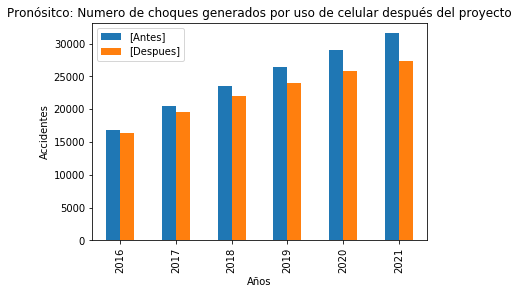

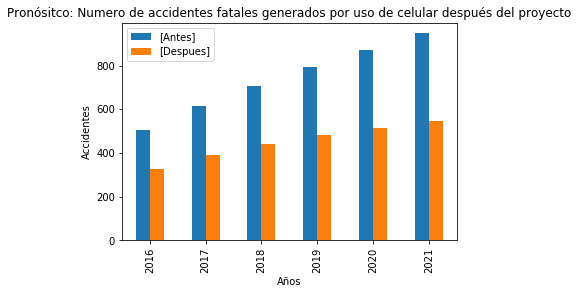

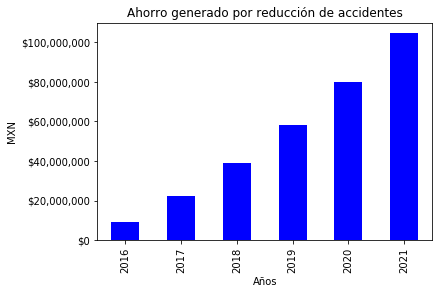

Ahorro por reducción de accidentes
['39036400.10063829', '58191469.07939862', '79980239.96233627', '104469965.92740926']
Vidas salvadas (dinero)
['451681701.2026544', '524941685.8630115', '599134586.0205935', '676035084.9778186']


In [4]:
    from matplotlib.ticker import FuncFormatter
    vehicle_forecast = pd.read_csv("output/forecast_vehicles.csv")
    smartphones_forecast = pd.read_csv("output/forecast_smartphone.csv")

    # df["accidentes"] = 7 * df["average"] / 1000

    def calculate_accidents(vehicles, distr):
        return 4.9 * vehicles * distr / (1000 * 60)

    smartphones_forecast["years"] = smartphones_forecast.years + 2015
    vehicle_forecast["years"] = vehicle_forecast.index + 2016
    results = pd.merge(vehicle_forecast[["average", "years"]], smartphones_forecast, on="years")
    results["smart_accidents"] = results.apply(lambda x: calculate_accidents(vehicles=x["average"], distr=x["delta"]),1)
    results["smart_accidents_after"] = results.apply(
        lambda x: calculate_accidents(vehicles=x["average"], distr=x["delta_project"]), 1)
    results["muertes"] = results["smart_accidents"] * 0.03
    results["muertes_after"] = results["smart_accidents_after"] * 0.02
    
    results["saved_lifes"] = results["muertes"] - results["muertes_after"]
    results["saved_lifes_money"] = results["saved_lifes"] * 1687037
    
    fatal_accidents_ = results.query("years >= 2018")["muertes"].sum()
    fatal_accidents_after_ = results.query("years >= 2018")["muertes_after"].sum()
    print("Number for fatal accidents : " + str(fatal_accidents_))
    print("Number for fatal accidents after : " + str(fatal_accidents_after_))
    print("Diff: " + str(fatal_accidents_ - fatal_accidents_after_))
    
    print("Saved lifes")
    print(results[["years", "saved_lifes", "saved_lifes_money"]])
    
    # Accidents generated by smartphones per year
    smart_accidents_img = join(FileConf.Paths.img, "smart_accidents.png")
    results.plot.bar(x="years", y="smart_accidents", color="b", legend=None)
    plt.title("Pronósitco: Numero de choques generados por uso de celular")
    plt.ylabel("Accidentes")
    plt.xlabel("Año")
                                                                                                                  
    plt.show()
    #plt.savefig(smart_accidents_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()
    
    # Muertes por accidentes viales relacionados con el uso de smartphones
    smart_accidents_deaths_img = join(FileConf.Paths.img, "smart_accidents_deaths.png")
    results.plot.bar(x="years", y="muertes", color="b", legend=None)
    plt.title("Pronósitco: Numero de accidentes fatales generados por uso de celular")
    plt.ylabel("Accidentes fatales")
    plt.xlabel("Año")
                                                                                                                  
    plt.show()
    #plt.savefig(smart_accidents_deaths_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()
    
    # Vidas salvadas
    
    saved_lifes_img = join(FileConf.Paths.img, "saved_lifes.png")
    results.plot.bar(x="years", y="saved_lifes", color="b", legend=None)
    plt.title("Pronósitco: Vidas salvadas")
    plt.ylabel("Vidas")
    plt.xlabel("Año")

    #plt.show()
    plt.savefig(saved_lifes_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()
    
    # VIDAS SALVADAS DINERO
    saved_lifes_money_img = join(FileConf.Paths.img, "saved_lifes_money.png")
    ax = results.plot.bar(x="years", y="saved_lifes_money", color="b", legend=None)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.0f}'.format(y)))
    plt.title("Pronósitco: Valor monetario de vidas salvadas")
    plt.ylabel("MXN")
    plt.xlabel("Año")

    #plt.show()
    plt.savefig(saved_lifes_money_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()
    
    # Cost per accident.

    # After project -- ACCIDENTS
    smart_accidents_after_img = join(FileConf.Paths.img, "smart_accidents_after.png")
    results[["years", "smart_accidents", "smart_accidents_after"]].rename(columns={
        "smart_accidents": "[Antes]",
        "smart_accidents_after": "[Despues]"
    }).plot.bar(x="years")
    plt.title("Pronósitco: Numero de choques generados por uso de celular después del proyecto")
    plt.ylabel("Accidentes")
    plt.xlabel("Años")
                                                                                                                  
    plt.show()                                                                                                              
    #plt.savefig(smart_accidents_after_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()
    
    
    # After project -- FATAL ACCIDENTS
    smart_fatal_accidents_after_img = join(FileConf.Paths.img, "smart_fatal_accidents_after.png")
    results[["years", "muertes", "muertes_after"]].rename(columns={
        "muertes": "[Antes]",
        "muertes_after": "[Despues]"
    }).plot.bar(x="years")
    plt.title("Pronósitco: Numero de accidentes fatales generados por uso de celular después del proyecto")
    plt.ylabel("Accidentes")
    plt.xlabel("Años")
                                                                                                                  
    plt.show()                                                                                                              
    #plt.savefig(smart_fatal_accidents_after_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    # Diff
    
    accident_savings_img = join(FileConf.Paths.img, "accident_savings.png")
    results["savings"] = 24603 * results.apply(lambda x: x["smart_accidents"] - x["smart_accidents_after"], 1)
    ax = results.plot.bar(x="years", y="savings", color="b", legend=None)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '${:,.0f}'.format(y)))
    plt.title("Ahorro generado por reducción de accidentes")
    plt.xlabel("Años")
    plt.ylabel("MXN")
    
    plt.show()
    #plt.savefig(accident_savings_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()
    
    
    
    savings = results.query("years >= 2018")["savings"].values
    print("Ahorro por reducción de accidentes")
    print([str(i) for i in savings])

    saved_lifes_mon = results.query("years >= 2018")["saved_lifes_money"].values
    print("Vidas salvadas (dinero)")
    print([str(i) for i in saved_lifes_mon])

## Create Vehicle Forecast

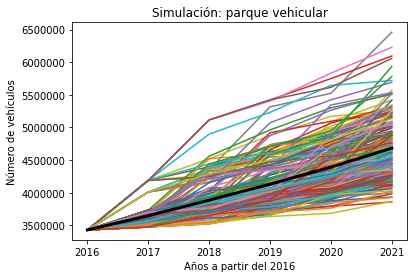

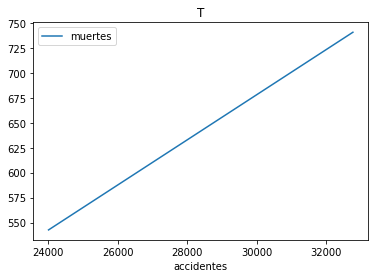

[3396176.34744234 3611839.81026894 3848466.65840197 4090355.20378637
 4349935.73487034 4636034.89526233]


In [28]:
    vehicles = pd.read_csv(join(FileConf.Paths.data, "vehiculos_en_circulacion.csv"))
    jalisco = vehicles.Jalisco.values
    years = vehicles.Anios.values
    jalisco_diff = jalisco[1:] / jalisco[:-1] - 1

    growth_last_10 = jalisco_diff[-20:]

    def get_next_gowth():
        return np.random.choice(growth_last_10, 5)

    def get_next(last):
        forecast = [last]
        for r in get_next_gowth():
            forecast.append(forecast[-1] * (1 + r))
        return forecast

    last = jalisco[-1]
    df = pd.DataFrame([])
    for i in range(200):
        df[str(i)] = get_next(last)

    df.index = (df.index + 2016).values

    vehicle_forecast_img = join(FileConf.Paths.img, "vehicle_forecast_img.png")
    df.plot(legend=False)
    plt.plot(df.index.values, df.mean(1).values, "k", linewidth=3)
    plt.title("Simulación: parque vehicular")
    plt.xlabel("Años a partir del 2016")
    plt.ylabel("Número de vehículos")

    plt.show()
    #plt.savefig(vehicle_forecast_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
    plt.close()

    df["average"] = df.mean(1)
    df["accidentes"] = 7 * df["average"] / 1000
    df["muertes"] = df["accidentes"] * 0.0226

    df.plot(x="accidentes", y="muertes")
    plt.title("T")
    plt.show()

    pronos_2016_vehicles = df.mean(1).values
    print(pronos_2016_vehicles)

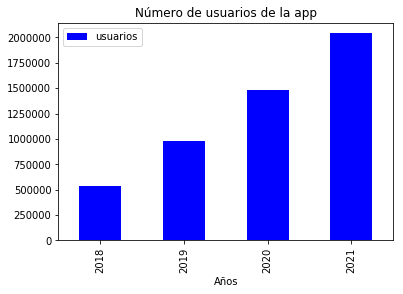

['538785.3321762758', '981685.2489087287', '1478978.1498559157', '2039855.3539154253']


In [10]:
drivers = pd.DataFrame([])

drivers["conductores"] = [3848466.65840197, 4090355.20378637, 4349935.73487034, 4636034.89526233]
drivers["usuarios"] = drivers["conductores"] * np.array([0.14, 0.24, 0.34, 0.44])
drivers["years"] = [2018, 2019, 2020, 2021]

users_img = join(FileConf.Paths.img, "users.png")
drivers.plot.bar(x="years", y="usuarios", color="b")
plt.title("Número de usuarios de la app")
plt.xlabel("Años")


plt.show()
#plt.savefig(users_img, bbox_inches="tight", pad_inches=0.5, dpi=100)
plt.close() 


print([str(i) for i in drivers["usuarios"].values])

In [9]:
gigas_per_user_year = 22.33
gigas = drivers["usuarios"].values * gigas_per_user_year
print([str(i) for i in gigas])

['12031076.467496237', '21921031.60813191', '33025582.086282596', '45549970.05293144']
